In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os

In [4]:
# ca fires geopandas
ca_fp = os.path.join('data', 'fhszs.sn', 'fhszs06_3.shp')
ca = gpd.read_file(ca_fp)

In [6]:
# sd salaries dset
sd_fp = os.path.join('data', 'san-diego-2017.csv')
sd_salaries = pd.read_csv(sd_fp)

In [26]:
# extract fire data
fire_sd = sd_salaries[sd_salaries['Job Title'].str.lower().str.contains('fire')]
fire_sd.head()

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,David P Gerboth,Fire Battalion Chief,81917.0,172590.0,68870.00,5194.0,323377.0,328571.0,2017,NaN,San Diego,FT
1,Glen A Bartolome,Fire Captain,85904.0,120682.0,99408.00,10107.0,305994.0,316101.0,2017,NaN,San Diego,FT
3,David W Pilkerton,Fire Battalion Chief,100110.0,118798.0,62895.00,18746.0,281803.0,300549.0,2017,NaN,San Diego,FT
4,Daniel S Reeves,Fire Captain,41389.0,196284.0,42027.00,20125.0,279700.0,299825.0,2017,NaN,San Diego,PT
5,Edward S Jones,Fire Captain,46020.0,171896.0,59944.00,19669.0,277860.0,297529.0,2017,NaN,San Diego,PT


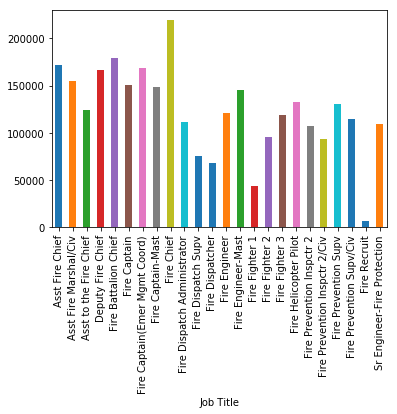

In [27]:
# mean total pay per position
fire_sd.groupby('Job Title')['Total Pay'].mean().plot(kind='bar')

In [32]:
# code to get proportions positions in the fire dept
fire_sd['Job Title'].value_counts(normalize=True)

Fire Fighter 2                   0.280236
Fire Captain                     0.218289
Fire Engineer                    0.193707
Fire Fighter 3                   0.074730
Fire Fighter 1                   0.067847
Fire Recruit                     0.035398
Fire Dispatcher                  0.034415
Fire Battalion Chief             0.033432
Fire Prevention Inspctr 2        0.014749
Deputy Fire Chief                0.008850
Fire Prevention Inspctr 2/Civ    0.007866
Fire Dispatch Supv               0.006883
Fire Helicopter Pilot            0.003933
Fire Captain-Mast                0.002950
Fire Engineer-Mast               0.002950
Sr Engineer-Fire Protection      0.001967
Asst Fire Marshal/Civ            0.001967
Fire Prevention Supv/Civ         0.001967
Asst Fire Chief                  0.001967
Fire Prevention Supv             0.001967
Fire Chief                       0.000983
Fire Captain(Emer Mgmt Coord)    0.000983
Fire Dispatch Administrator      0.000983
Asst to the Fire Chief           0

In [45]:
# ca counties dataset
test = gpd.read_file('data/cnty18_2/cnty18_2.gdb')
test = test.dissolve('COUNTY_ABBREV')

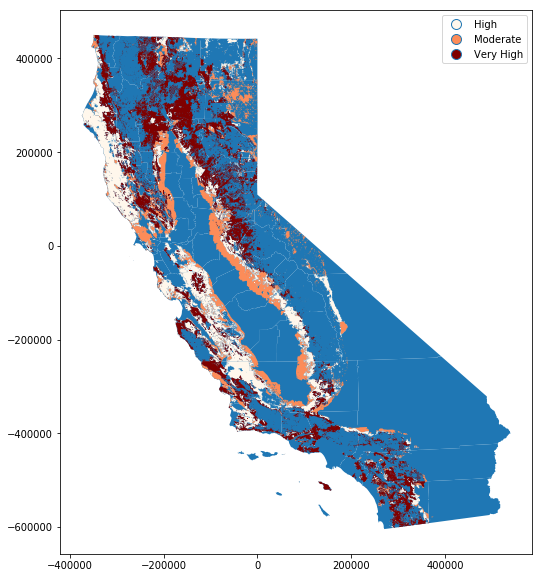

In [46]:
# plot ca fire risk on top of ca counties
ax = test.plot(figsize=(10,10))
ca.plot(ax=ax,
        column='HAZ_CLASS',
        cmap='OrRd',
        legend=True)

In [48]:
# unique county names
test.COUNTY_NAME.unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Mendocino', 'Merced', 'Mono', 'Monterey',
       'Modoc', 'Marin', 'Mariposa', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'Santa Barbara',
       'San Bernardino', 'San Benito', 'Santa Clara', 'Santa Cruz',
       'San Diego', 'San Francisco', 'Shasta', 'Sierra', 'Siskiyou',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)